In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
JHMDB_PATH = '/beegfs/ua349/lstm/JHMDB'

imfolder = '%s/Rename_Images' % (JHMDB_PATH)
maskfolder = '%s/puppet_mask' % (JHMDB_PATH)
maskfolder = '%s/joint_positions' % (JHMDB_PATH)

cats = os.listdir(imfolder)

In [3]:
def just_folders(ls):
    return [fl for fl in ls if '.' not in fl]

In [4]:
imlens = []
for catfolder in just_folders(cats):    
    vidnames = os.listdir('%s/%s' % (imfolder, catfolder))
    for vidfolder in just_folders(vidnames):
        imgs = os.listdir('%s/%s/%s' % (imfolder, catfolder, vidfolder))
        imlens.append(len(imgs))

In [5]:
dist = np.zeros(np.max(imlens) + 1)
for ll in imlens:
    dist[ll] += 1

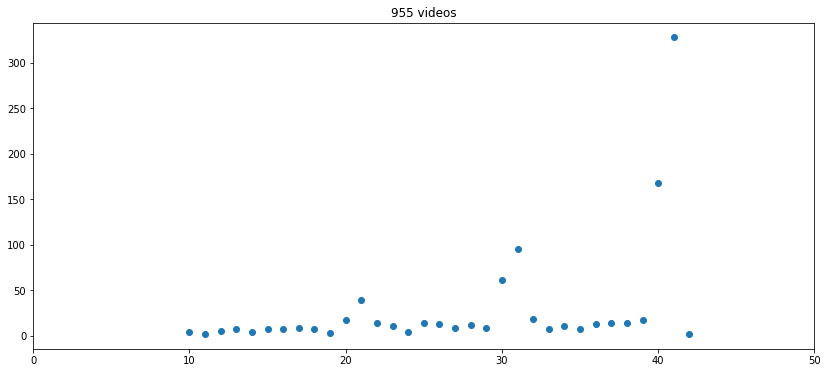

In [10]:
plt.figure(figsize=(14, 6))
plt.title('%d videos' % len(imlens))
plt.xlim(0, 50)
plt.scatter(
    [ii for ii in range(len(dist)) if dist[ii] > 0],
    [val for val in dist if val > 0])
plt.show()

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
from generate_video import *

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


No mask: /beegfs/ua349/lstm/JHMDB/puppet_mask/catch/LearnToShootFromTheMaster_catch_f_nm_np1_ba_med_2/puppet_mask.mat
No mask: /beegfs/ua349/lstm/JHMDB/puppet_mask/catch/Sam_Cooksey_Goalkeeper_Training_catch_f_cm_np1_le_bad_3/puppet_mask.mat
No mask: /beegfs/ua349/lstm/JHMDB/puppet_mask/catch/Sam_Cooksey_Goalkeeper_Training_catch_f_cm_np1_ri_bad_1/puppet_mask.mat
No mask: /beegfs/ua349/lstm/JHMDB/puppet_mask/catch/St__Louis_Goalkeeping__Academy_elite_training_catch_f_nm_np1_le_bad_3/puppet_mask.mat
No mask: /beegfs/ua349/lstm/JHMDB/puppet_mask/jump/IamLegend_jump_f_cm_np1_ba_bad_12/puppet_mask.mat
No mask: /beegfs/ua349/lstm/JHMDB/puppet_mask/jump/THE_PROTECTOR_jump_f_cm_np1_ba_bad_30/puppet_mask.mat
No mask: /beegfs/ua349/lstm/JHMDB/puppet_mask/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_cm_np1_le_med_6/puppet_mask.mat
No mask: /beegfs/ua349/lstm/JHMDB/puppet_mask/kick_ball/FC_Venus_-_Ausschnitt_Teil_2_kick_ball_f_cm_np1_fr_med_0/puppet_mask.mat
No mask: /beegfs

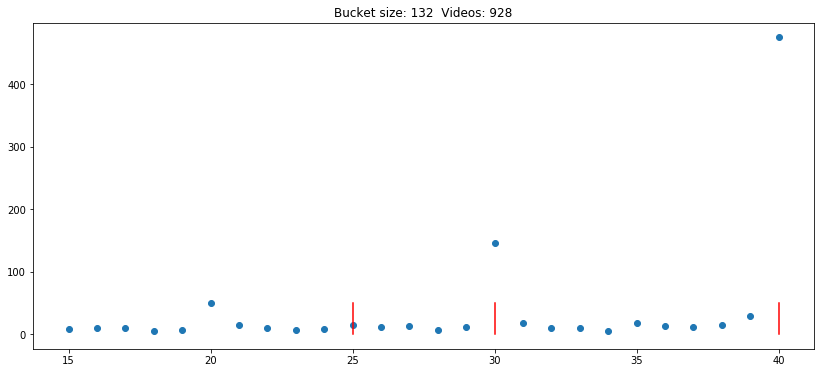

In [39]:
dset = MultiVideoDataset(seqlen=4, speedup=2, bins=7, plot_buckets=True, source='jhmdb')